In [ ]:
pip install dynamiqs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.5/506.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.0/102.0 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.3/84.3 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Success

In [30]:
import dynamiqs as dq
import jax
import jax.numpy as jnp # the JAX version of numpy
from matplotlib import pyplot as plt
import numpy as np


Task 1.1:

In [ ]:
na = 20 # Hilbert space dimension
nb = 5

g2 = 1.0
ed = -4.0
kb = 10 # two-photon loss rate

a = dq.tensor(dq.destroy(na), dq.eye(nb)) # annihilation operator
b = dq.tensor(dq.eye(na), dq.destroy(nb))
psi0 = dq.tensor(dq.fock(na, 0), dq.fock(nb, 0)) # initial state
# H = dq.zeros(na) # zero Hamiltonian

H = (g2 * a @ a @ a @ a @ b.dag()) + (g2 * a.dag() @ a.dag() @ a.dag() @ a.dag() @ b) + (ed * b) + (ed * b.dag()) # Hamiltonian

# alpha = 2.0 # cat size
T = 4
tsave = np.linspace(0, T, 100)
loss_op = jnp.sqrt(kb) * b # dq.tensor(dq.zeros(na), np.sqrt(kb)*dq.destroy(nb))

exp_ops = [dq.dag(a) @ a]

res_111 = dq.mesolve(H, [loss_op], psi0, tsave, exp_ops=exp_ops)

|▎         |   3.0% ◆ elapsed 84.94ms ◆ remaining 0.00ms

|██████▉   |  69.7% ◆ elapsed 4.01s ◆ remaining 1.83s
|██████████| 100.0% ◆ elapsed 5.87s ◆ remaining 0.00ms

100%|██████████| 50/50 [00:12<00:00,  3.96it/s]


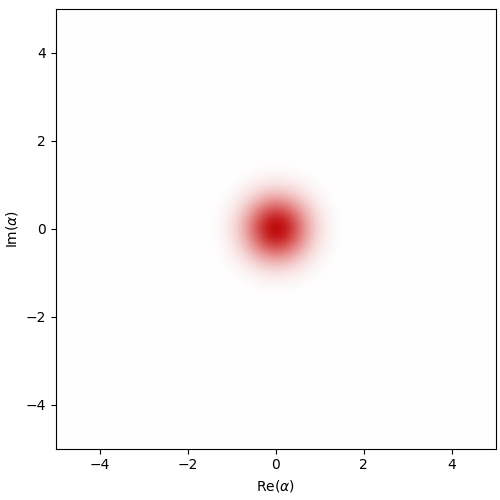

In [ ]:
A = dq.ptrace(res_111.states, 0)
dq.plot.wigner_gif(A)

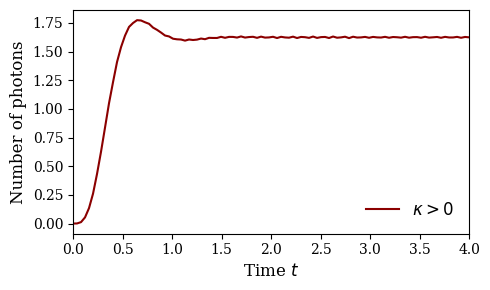

In [ ]:
# @title **Fig. 1.1.2:** Plot of average number of photons as a function of time
plt.rcParams["font.family"] = "serif"

# Define dark red color
dark_red = "#8B0000"  # Hex code for dark red

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

# Plot with dark red color
ax.plot(tsave, res_111.expects[0].real ,color=dark_red, label=r"$\kappa > 0$")

# Set limits
ax.set_xlim((0, T))

# Axis labels
ax.set_xlabel(r"Time $t$", fontsize=12)
ax.set_ylabel(r"Number of photons", fontsize=12)

# Legend
ax.legend(fontsize=12, frameon=False)

# Adjust layout
plt.tight_layout()
plt.show()

# Now we try to increase the photon count

In [44]:
na = 20 # Hilbert space dimension
nb = 5

g2 = 1.0
ed = -13.0
kb = 10 # two-photon loss rate

a = dq.tensor(dq.destroy(na), dq.eye(nb)) # annihilation operator
b = dq.tensor(dq.eye(na), dq.destroy(nb))
psi0 = dq.tensor(dq.fock(na, 0), dq.fock(nb, 0)) # initial state
# H = dq.zeros(na) # zero Hamiltonian

H = (g2 * a @ a @ a @ a @ b.dag() ) + (g2 * a.dag() @ a.dag() @ a.dag() @ a.dag() @ b) + (ed * b) + (ed * b.dag()) # Hamiltonian

# alpha = 2.0 # cat size
T = 4
tsave = np.linspace(0, T, 100)
loss_op = jnp.sqrt(kb) * b # dq.tensor(dq.zeros(na), np.sqrt(kb)*dq.destroy(nb))

exp_ops = [dq.dag(a) @ a]

res_111 = dq.mesolve(H, [loss_op], psi0, tsave, exp_ops=exp_ops)

|          |   0.2% ◆ elapsed 10.61ms ◆ remaining 0.00ms


|██████████| 100.0% ◆ elapsed 5.88s ◆ remaining 0.00ms 

100%|██████████| 50/50 [00:12<00:00,  3.96it/s]


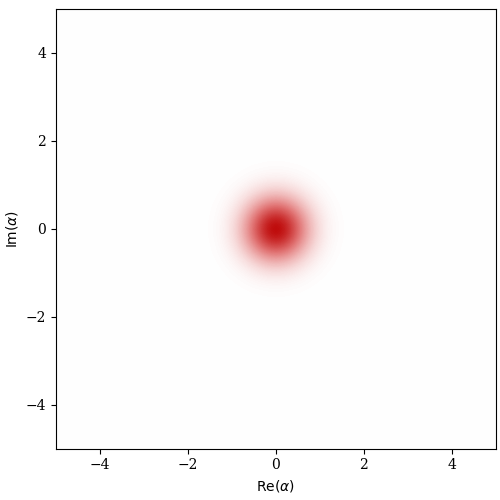

In [45]:
A = dq.ptrace(res_111.states, 0)
dq.plot.wigner_gif(A)

|██████████| 100.0% ◆ elapsed 7.82s ◆ remaining 0.00ms 


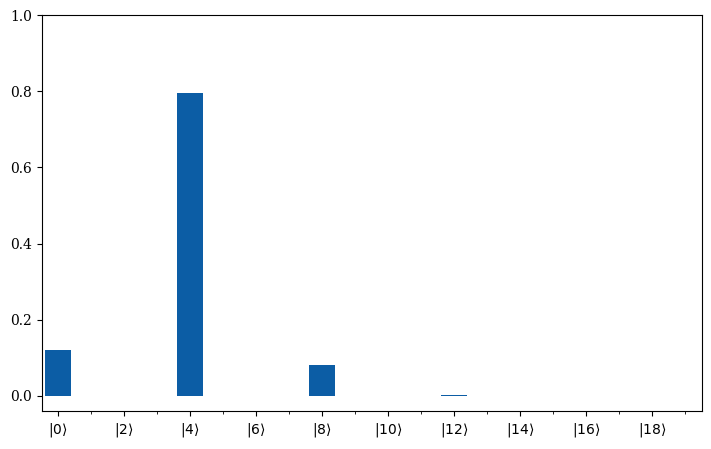

In [26]:
dq.plot.fock(A[-1])

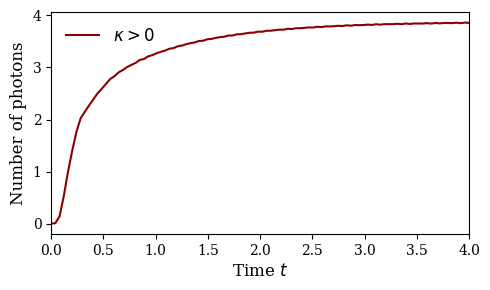

In [23]:
# @title **Fig. 1.1.2:** Plot of average number of photons as a function of time
plt.rcParams["font.family"] = "serif"

# Define dark red color
dark_red = "#8B0000"  # Hex code for dark red

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

# Plot with dark red color
ax.plot(tsave, res_111.expects[0].real ,color=dark_red, label=r"$\kappa > 0$")

# Set limits
ax.set_xlim((0, T))

# Axis labels
ax.set_xlabel(r"Time $t$", fontsize=12)
ax.set_ylabel(r"Number of photons", fontsize=12)

# Legend
ax.legend(fontsize=12, frameon=False)

# Adjust layout
plt.tight_layout()
plt.show()

# BUfferless 4 photon dissipation

In [50]:
#Generating the bufferless system. All interactions are modeled by the loss operator

na = 20 # Hilbert space dimension

#-----
x_aa = 312/(10**6)
x_bb = 200
x_ab = 0.5
delta = 153/(10**3)
big_delta = 50
g1 = .899

#xi_gaa = ((np.abs(g1)**2)/big_delta) - ((np.abs(g2)**2)/big_delta)

xi_gaa = x_aa/2
gamma_1 = 2

g_4ph = g1 * g2 * np.sqrt(2) * ((1/big_delta) - (1/(x_bb + big_delta)))

k_2ph = ((np.abs(g1)**2)/(big_delta**2) + (np.abs(g1)**2)/((big_delta + x_bb)**2))

k_4ph = 2 * np.abs(g_4ph)**2 / gamma_1
g2 = 1.0
ed = -4.0
kb = 10 # two-photon loss rate
kappa_2 = 4 * np.abs(g2)**2 / kb
alpha = jnp.sqrt(-ed/(g2)) #NOTE THAT THIS ASSUMES THAT G2 IS REAL

a = dq.destroy(na) # annihilation operator
psi0 = dq.fock(na, 0) # initial state
# H = dq.zeros(na) # zero Hamiltonian

H = (xi_gaa - x_aa) * a.dag() @ a.dag() @ a @ a

# alpha = 2.0 # cat size
T = 90
tsave = np.linspace(0, T, 100)
loss_op_new = np.sqrt(k_4ph)*(a @ a @ a @ a - alpha**4 * dq.eye(na)) + np.sqrt(k_2ph)*(a @ a )

exp_ops = [dq.dag(a) @ a]

res_121 = dq.mesolve(H, [loss_op_new], psi0, tsave, exp_ops=exp_ops)

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

100%|██████████| 50/50 [00:10<00:00,  4.63it/s]


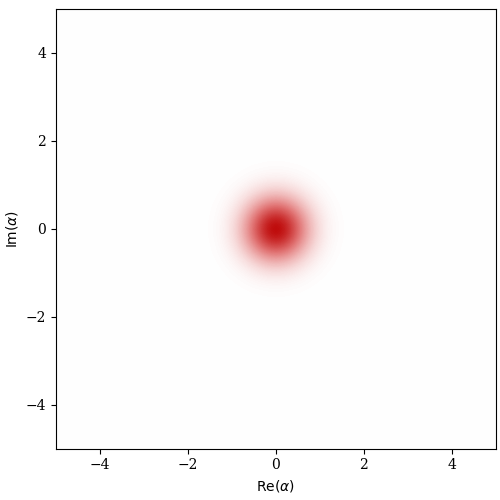

In [51]:
dq.plot.wigner_gif(res_121.states)